In [1]:
import pandas_datareader.data as web
from datetime import datetime, timedelta
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error
from arch import arch_model

In [2]:
df = pd.read_csv('Honda.csv', delimiter=';')
print(df)
print(df.dtypes)

            Date    Price     Open     High      Low      Volume     Change
0     04/01/2018  1328,70  1308,30  1328,70  1302,00  14890000,0   0,032200
1     05/01/2018  1340,30  1333,30  1351,30  1330,00  14300000,0   0,008700
2     09/01/2018  1336,70  1347,30  1352,30  1332,30  10340000,0  -0,002700
3     10/01/2018  1367,30  1345,00  1383,70  1342,70  14080000,0   0,022900
4     11/01/2018  1342,00  1345,00  1351,70  1332,70  12090000,0  -0,018500
...          ...      ...      ...      ...      ...         ...        ...
1447  08/12/2023  1458,00  1488,00  1490,00  1450,50  28600000,0  -0,025700
1448  11/12/2023  1494,50  1496,00  1501,00  1486,50  14850000,0   0,025000
1449  12/12/2023  1477,50  1501,00  1502,00  1477,50  11320000,0  -0,011400
1450  13/12/2023  1469,00  1476,50  1477,00  1456,00  14080000,0  -0,005800
1451  14/12/2023  1395,50  1434,00  1439,50  1389,00  27040000,0  -0,050000

[1452 rows x 7 columns]
Date      object
Price     object
Open      object
High      ob

In [3]:
df['Price'] = df['Price'].str.replace(',', '.').astype(float)
df['Open'] = df['Open'].str.replace(',', '.').astype(float)
df['High'] = df['High'].str.replace(',', '.').astype(float)
df['Low'] = df['Low'].str.replace(',', '.').astype(float)
df['Volume'] = df['Volume'].str.replace(',', '.').astype(float)
df['Change'] = df['Change'].str.replace(',', '.').astype(float)

print(df)
df.describe()

            Date   Price    Open    High     Low      Volume  Change
0     04/01/2018  1328.7  1308.3  1328.7  1302.0  14890000.0  0.0322
1     05/01/2018  1340.3  1333.3  1351.3  1330.0  14300000.0  0.0087
2     09/01/2018  1336.7  1347.3  1352.3  1332.3  10340000.0 -0.0027
3     10/01/2018  1367.3  1345.0  1383.7  1342.7  14080000.0  0.0229
4     11/01/2018  1342.0  1345.0  1351.7  1332.7  12090000.0 -0.0185
...          ...     ...     ...     ...     ...         ...     ...
1447  08/12/2023  1458.0  1488.0  1490.0  1450.5  28600000.0 -0.0257
1448  11/12/2023  1494.5  1496.0  1501.0  1486.5  14850000.0  0.0250
1449  12/12/2023  1477.5  1501.0  1502.0  1477.5  11320000.0 -0.0114
1450  13/12/2023  1469.0  1476.5  1477.0  1456.0  14080000.0 -0.0058
1451  14/12/2023  1395.5  1434.0  1439.5  1389.0  27040000.0 -0.0500

[1452 rows x 7 columns]


,Price,Open,High,Low,Volume,Change
count,1452.000000,1452.000000,1452.000000,1452.000000,1.452000e+03,1452.000000
mean,1105.688912,1106.123485,1115.705579,1095.946556,1.393168e+07,0.000222
std,183.522697,184.289369,184.962911,182.567989,5.240151e+06,0.018327
min,711.800000,717.200000,746.700000,706.700000,3.360000e+06,-0.071000
25%,995.375000,995.725000,1005.600000,986.525000,1.040000e+07,-0.010100
50%,1087.000000,1088.300000,1097.150000,1078.150000,1.284000e+07,0.000000
75%,1172.700000,1174.400000,1181.325000,1163.850000,1.624750e+07,0.010225
max,1802.300000,1802.300000,1821.000000,1780.000000,4.645000e+07,0.106200


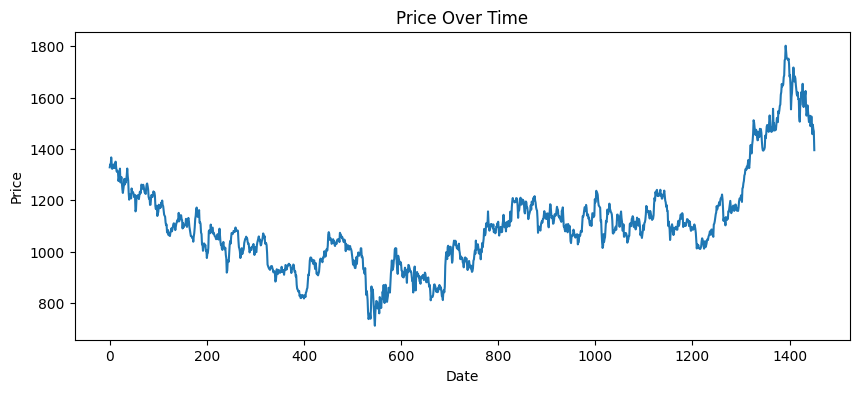

In [4]:
# Assuming you have a DataFrame 'df' with a 'Price' column
plt.figure(figsize=(10, 4))
plt.plot(df['Price'])
plt.title('Price Over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

In [5]:
returns = 100 * df.Price.pct_change().dropna()
returns

1       0.873034
2      -0.268597
3       2.289220
4      -1.850362
5      -1.438152
          ...   
1447   -2.572670
1448    2.503429
1449   -1.137504
1450   -0.575296
1451   -5.003404
Name: Price, Length: 1451, dtype: float64

In [6]:
#Split data into train, test sets with a ratio of 6:4
train_size = int(0.6 * len(returns))
test_size =len(returns) - train_size

train_data = returns[:train_size]

#Training process
x_train = np.array(train_data.index).reshape(-1, 1)
y_train = np.array(train_data)

In [7]:
model = arch_model(y_train, p=1, q=5)
model_fit = model.fit()
model_fit.summary()

Iteration:      1,   Func. Count:     10,   Neg. LLF: 20269190909.157593
Iteration:      2,   Func. Count:     22,   Neg. LLF: 1902.7679918538902
Iteration:      3,   Func. Count:     32,   Neg. LLF: 1797.572152951106
Iteration:      4,   Func. Count:     42,   Neg. LLF: 1769.9146554732977
Iteration:      5,   Func. Count:     53,   Neg. LLF: 1745.3404400039358
Iteration:      6,   Func. Count:     63,   Neg. LLF: 1750.8889471952557
Iteration:      7,   Func. Count:     73,   Neg. LLF: 1745.771879645601
Iteration:      8,   Func. Count:     83,   Neg. LLF: 1742.1879701015691
Iteration:      9,   Func. Count:     93,   Neg. LLF: 1749.5831765064963
Iteration:     10,   Func. Count:    103,   Neg. LLF: 1741.6395846506189
Iteration:     11,   Func. Count:    112,   Neg. LLF: 1741.6634420718556
Iteration:     12,   Func. Count:    122,   Neg. LLF: 1741.6351491385676
Iteration:     13,   Func. Count:    131,   Neg. LLF: 1741.633941442069
Iteration:     14,   Func. Count:    140,   Neg. LLF: 

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/arch/univariate/base.py:1890: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if isinstance(table_val[pos], (np.float64, float)):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/arch/univariate/base.py:1891: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  assert isinstance(table_val[pos], float)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/arch/univariate/base.py:1892: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys

<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:                      y   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -1741.63
Distribution:                  Normal   AIC:                           3499.27
Method:            Maximum Likelihood   BIC:                           3537.42
                                        No. Observations:                  870
Date:                Sun, Dec 31 2023   Df Residuals:                      869
Time:                        18:45:01   Df Model:                            1
                               Mean Model                               
========================================================================
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
mu            -0.0252  7.592e-02     -0.331      0.740 [ -0.174,  0.124]
                             Volatility Model                             
==========================================================================
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
omega          0.2780      0.436      0.637      0.524   [ -0.577,  1.133]
alpha[1]       0.1826  7.785e-02      2.345  1.900e-02 [3.001e-02,  0.335]
beta[1]        0.1338      0.827      0.162      0.871   [ -1.487,  1.755]
beta[2]        0.0000      0.499      0.000      1.000   [ -0.979,  0.979]
beta[3]        0.4805      1.528      0.314      0.753   [ -2.515,  3.476]
beta[4]        0.0708      2.972  2.383e-02      0.981   [ -5.754,  5.896]
beta[5]        0.0567      0.965  5.876e-02      0.953   [ -1.835,  1.949]
==========================================================================

Covariance estimator: robust
"""

In [8]:
#Find the best model from train
# Assuming 'returns' is your time series data

best_aic = np.inf
best_p, best_q = None, None

# Iterate through different combinations of p and q
max_p, max_q = 5, 5
for p in range(1, max_p + 1):
    for q in range(1, max_q + 1):
        model = arch_model(y_train, vol='Garch', p=p, q=q)
        model_fit = model.fit(disp='off')

        # Calculate AIC for the current model
        aic = model_fit.aic

        # Update the best model parameters if the current model has a lower AIC
        if aic < best_aic:
            best_aic = aic
            best_p, best_q = p, q

# Fit the best model to the entire dataset
final_model_fit = arch_model(y_train, vol='Garch', p=best_p, q=best_q).fit(disp='off')


# Display the best model's parameters and AIC
print("Best Model Parameters: p={}, q={}".format(best_p, best_q))
print("AIC of the Best Model: {}".format(best_aic))


Best Model Parameters: p=1, q=3
AIC of the Best Model: 3496.060795756276


In [9]:
rolling_predictions = []

for i in range(test_size):
    train = returns[:-(test_size-i)]
    model = arch_model(train, p=best_p, q=best_q)
    model_fit = model.fit(disp='off')
    pred = model_fit.forecast(horizon=1)
    rolling_predictions.append(np.sqrt(pred.variance.values[-1,:][0]))

In [10]:
rolling_predictions = pd.Series(rolling_predictions, index=returns.index[-test_size:])

In [11]:
forecasted_next_30_days = []
for i in range(30):
    train = returns[:-(test_size+i)]
    model = arch_model(train, p=best_p, q=best_q)
    model_fit = model.fit(disp='off')
    pred = model_fit.forecast(horizon=1)
    forecasted_next_30_days.append(np.sqrt(pred.variance.values[-1:][0]))

In [12]:
# 7. Evaluate the accuracy of testing
test_actual_values = returns[-test_size:]
test_predicted_values = rolling_predictions[returns.index[-test_size:]]
from sklearn.metrics import mean_absolute_error as MAE
from sklearn.metrics import mean_squared_error as MSE
# Calculate RMSE
test_rmse = np.sqrt(MSE(test_actual_values, test_predicted_values))
# Calculate MAPE for non-zero actual values
non_zero_mask = test_actual_values != 0
test_mape = np.mean(np.abs((test_actual_values[non_zero_mask] - test_predicted_values[non_zero_mask]) / test_actual_values[non_zero_mask])) * 100
# Calculate MAE
test_mae = MAE(test_actual_values, test_predicted_values)

def huber_loss(y_true, y_pred, delta=1.0):
    error = y_true - y_pred
    condition = np.abs(error) < delta
    squared_loss = 0.5 * (error**2)
    linear_loss = delta * (np.abs(error) - 0.5 * delta)
    return np.where(condition, squared_loss, linear_loss)

# Calculate Huber Loss
test_huber_loss = np.mean(huber_loss(test_actual_values, test_predicted_values, delta=1.0))

# Print
print('Testing RMSE:', test_rmse)
print('Testing MAPE:', test_mape)
print('Testing MAE:', test_mae)
print('Testing Huber Loss:', test_huber_loss)

Testing RMSE: 2.3618870955996414
Testing MAPE: 444.0882213897349
Testing MAE: 1.9313129287654338
Testing Huber Loss: 1.4746102320587773


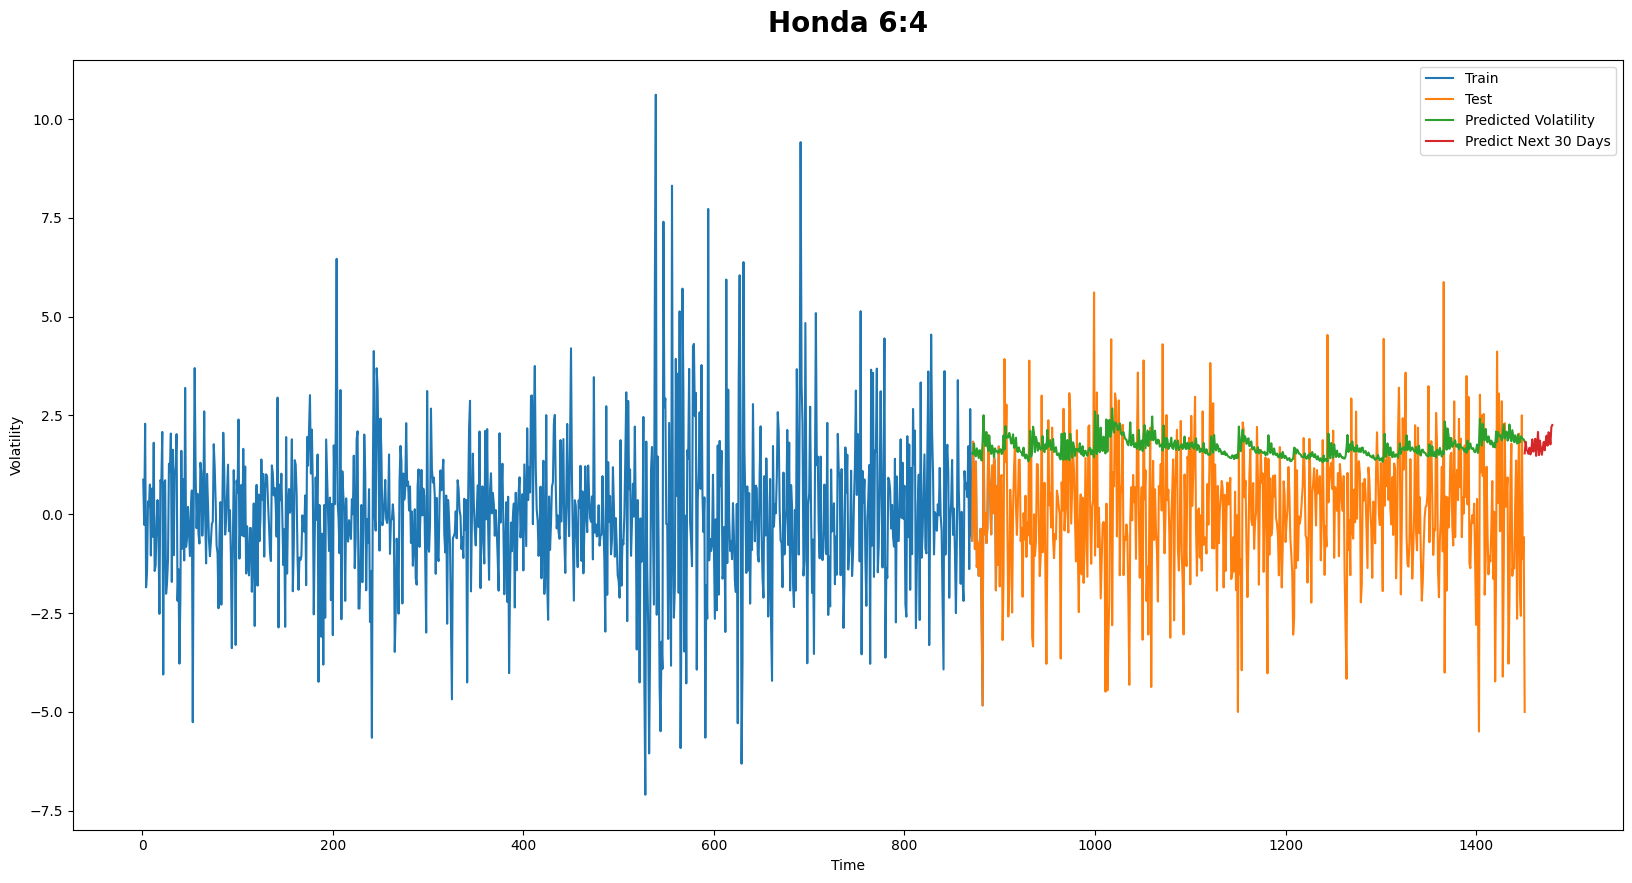

In [13]:
# Lấy index từ ngày tiếp theo trở đi
index_forecasted = range(len(returns), len(returns)+ len(forecasted_next_30_days))

# Plot biểu đồ với index được điều chỉnh
plt.figure(figsize=(20,10 ))
train, = plt.plot(returns[:-(test_size - i)])
test, = plt.plot(returns[-test_size:])
preds, = plt.plot(rolling_predictions)
forecast, = plt.plot(index_forecasted, forecasted_next_30_days)


plt.legend(['Train', 'Test', 'Predicted Volatility', 'Predict Next 30 Days'], fontsize=10)
plt.title('Honda 6:4', fontweight='bold', fontsize=20, pad=20)
plt.xlabel('Time')
plt.ylabel('Volatility')


# Show the plot
plt.show()
